# Mohd Shoaib - 19A1HP027

In [1]:
import pandas as pd #This loads the files as data frames
import numpy as np #This is a library of python used for arithmatics
df_advert = pd.read_csv('Advertising.csv') #reading the dataset 

In [2]:
df_advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [3]:
df_advert[df_advert.Day.isnull()] #finding out null values

,Sno,TV,Radio,Newspaper,Day,Sales
16,17,67.8,36.6,NaN,NaN,3.2
42,43,293.6,NaN,1.8,NaN,10.4
68,69,NaN,27.5,11.0,NaN,12.8


In [4]:
df_advert = df_advert.dropna(subset = ['Day']) #delete all rows with Null value
df_advert.info() # Check if there are equal number non null of rows for each column


<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        197 non-null    int64  
 1   TV         197 non-null    float64
 2   Radio      197 non-null    float64
 3   Newspaper  197 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      197 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


In [5]:
df_advert[df_advert.Day.isnull()] #checking if null rows are deleted

,Sno,TV,Radio,Newspaper,Day,Sales


In [6]:
df_advert['Day'].unique() ##This will give unique values in column

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [7]:
pd.get_dummies(df_advert['Day']) #to convert categorical to indicator variables

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
195,0,1,0
196,0,1,0
197,0,1,0
198,1,0,0


In [8]:
categorical_features = ['Day'] # making variable for categorical var
X_features = ['TV', 'Radio', 'Newspaper', 'Day'] 

In [9]:
enc_df = pd.get_dummies(df_advert[X_features], columns = categorical_features) #to add category  

In [10]:
enc_df.columns #display new columns

Index(['TV', 'Radio', 'Newspaper', 'Day_Holiday', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')

In [11]:
X_features = enc_df.columns #now make a list of independent columns
X_features 

Index(['TV', 'Radio', 'Newspaper', 'Day_Holiday', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')

In [12]:
enc_df.describe() # describing the summary of statistics

,TV,Radio,Newspaper,Day_Holiday,Day_Weekdays,Day_Weekend
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,0.020305,0.766497,0.213198
std,85.439138,14.922793,20.972370,0.141399,0.424137,0.410610
min,0.700000,0.000000,0.300000,0.000000,0.000000,0.000000
25%,74.700000,9.900000,12.900000,0.000000,1.000000,0.000000
50%,149.700000,22.300000,25.900000,0.000000,1.000000,0.000000
75%,218.400000,36.500000,45.100000,0.000000,1.000000,0.000000
max,296.400000,49.600000,100.900000,1.000000,1.000000,1.000000


In [13]:
df_advert['Sales'].describe() # describing sales column

count    197.000000
mean      14.102030
std        5.192302
min        1.600000
25%       10.400000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

In [14]:
import matplotlib.pyplot as plt # importing matplotlib as it required for plotting in python
import seaborn as sn # import Seaborn,it is a library for making statistical graphics in Python.
%matplotlib inline

In [15]:
import warnings 
warnings.filterwarnings('ignore') # used to ignore the warning given by plot functions

In [16]:
sales_day = df_advert.groupby('Day')['Sales'].mean().reset_index() # Finding the mean sales and group them by days
sales_day

,Day,Sales
0,Holiday,13.175000
1,Weekdays,14.033113
2,Weekend,14.438095


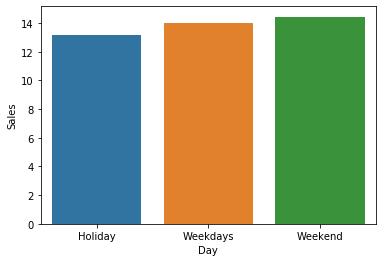

In [17]:
sn.barplot(x = 'Day', y = 'Sales', data = sales_day); # plotting bar chart with X and Y axis

## Sales are higher  during weekends

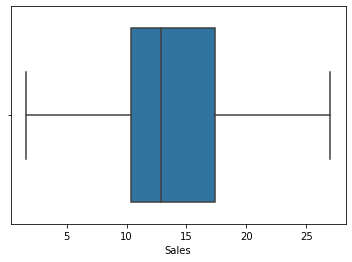

In [19]:
sn.boxplot(df_advert['Sales']) # using boxplot for sales column to check for any outliers

## Their is no outliers in sales columns


In [20]:
enc_df.head(5)

,TV,Radio,Newspaper,Day_Holiday,Day_Weekdays,Day_Weekend
0,230.1,37.8,69.2,0,0,1
1,44.5,39.3,45.1,0,1,0
2,17.2,45.9,69.3,0,1,0
3,151.5,41.3,58.5,0,1,0
4,180.8,10.8,58.4,0,1,0


In [21]:
import statsmodels.api as sm # importing library
from sklearn.model_selection import train_test_split 
X = sm.add_constant(enc_df) # adding a new column constant along with all the independent variables.
Y = df_advert['Sales'] # defing the y axis in equation
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.7, random_state = 64 ) # splitting data into 70% and 30% Train & validation set

In [22]:
df_model = sm.OLS(train_y, train_X).fit() # fit the set in OLS i.e. Ordinary Least sqaure model
df_model.summary2() #printing the summary

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.028  
Dependent Variable: Sales            AIC:                843.0653
Date:               2020-08-12 08:56 BIC:                860.5852
No. Observations:   137              Log-Likelihood:     -415.53 
Df Model:           5                F-statistic:        0.2522  
Df Residuals:       131              Prob (F-statistic): 0.938   
R-squared:          0.010            Scale:              26.392  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const          9.3130    1.5128   6.1560  0.0000   6.3203  12.3057
TV             0.0054    0.0070   0.7760  0.4391  -0.0084   0.0193
Radio         -0.0108    0.0309  -0.3494  0.7274  -0.0718   0.0503
Newspaper      0.0036    0.0230   0.1563  0.8760  -0.0420   0.0492
Day_Holiday    1.3364    2.8061   0.4762  0.6347  -4.2148   6.8876
Day_Weekdays   4.5570    1.0626   4.2887  0.0000   2.4550   6.6590
Day_Weekend    3.4196    1.3625   2.5098  0.0133   0.7243   6.1149
-----------------------------------------------------------------
Omnibus:          6.606   Durbin-Watson:      2.079              
Prob(Omnibus):    0.037   Jarque-Bera (JB):   6.173              
Skew:             0.458   Prob(JB):           0.046              
Kurtosis:         2.507   Condition No.:      2342475111949328896
=================================================================
* The condition number is large (2e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

<Figure size 576x432 with 0 Axes>

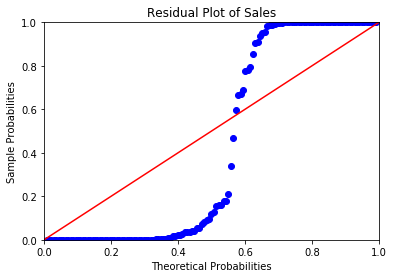

In [23]:
sales_r = df_model.resid
probplot = sm.ProbPlot( sales_r ) #Checking Normality
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Residual Plot of Sales" )
plt.show()

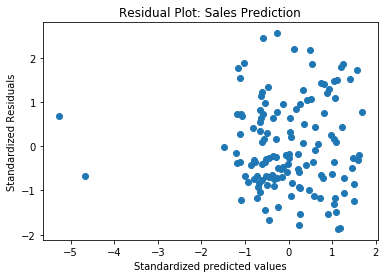

In [24]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter( get_standardized_values( df_model.fittedvalues ), # plotting Test of Homoscedasticity
get_standardized_values( sales_r ) )
plt.title( "Residual Plot: Sales Prediction" ); 
plt.xlabel( "Standardized predicted values") 
plt.ylabel( "Standardized Residuals"); 

In [25]:
from scipy.stats import zscore
enc_df['z_score_sales'] = zscore( df_advert.Sales )
enc_df[ (enc_df.z_score_sales > 3.0) | (enc_df.z_score_sales < -3.0) ] # checking z score between 3 to -3

,TV,Radio,Newspaper,Day_Holiday,Day_Weekdays,Day_Weekend,z_score_sales


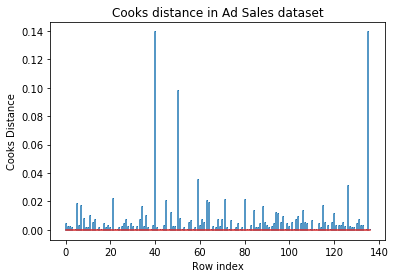

In [26]:
import numpy as np
ad_influence = df_model.get_influence()
(c, p) = ad_influence.cooks_distance
plt.stem( np.arange( len( train_X) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( "Cooks distance in Ad Sales dataset" ); 
plt.xlabel( "Row index") 
plt.ylabel( "Cooks Distance"); 

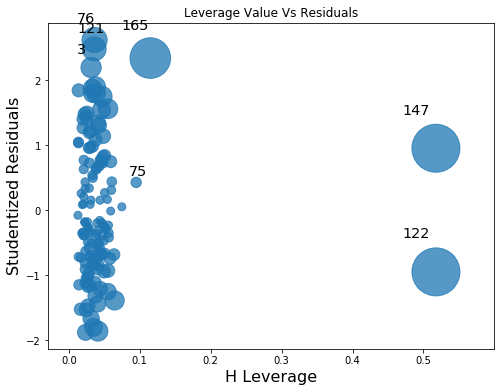

In [27]:
from statsmodels.graphics.regressionplots import influence_plot # importing libraries
fig, ax = plt.subplots( figsize=(8,6) ) # plotting LVT
influence_plot( df_model, ax = ax )
plt.title( "Leverage Value Vs Residuals") 
plt.show(); # print the plot

## RMSE for Validation Data

In [28]:
predict_y = df_model.predict( test_X )
from sklearn.metrics import mean_squared_error
from sklearn import metrics
np.sqrt(mean_squared_error(test_y, predict_y)) # comparing MSE

5.5483324280311805

In [30]:
np.round( metrics.r2_score(predict_y, test_y), 2 )#measuring R square

-109.92

In [31]:
X_new_feat = ["TV","Radio", "Newspaper"] # numeric variables

In [32]:
train_X = train_X[X_new_feat]
advert_2 = sm.OLS(train_y, train_X).fit()
advert_2.summary2()
#  this model is much better as it shows 75% of the variability. 
#prob of F statistic is low, so model is statistically significant,

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.755   
Dependent Variable:     Sales            AIC:                         942.7232
Date:                   2020-08-12 09:03 BIC:                         951.4831
No. Observations:       137              Log-Likelihood:              -468.36 
Df Model:               3                F-statistic:                 141.5   
Df Residuals:           134              Prob (F-statistic):          2.37e-41
R-squared (uncentered): 0.760            Scale:                       55.794  
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
TV             0.0389        0.0059      6.6149      0.0000      0.0273      0.0505
Radio          0.1493        0.0404      3.6937      0.0003      0.0694      0.2293
Newspaper      0.1000        0.0313      3.1997      0.0017      0.0382      0.1619
------------------------------------------------------------------------------
Omnibus:                   0.587            Durbin-Watson:               1.923
Prob(Omnibus):             0.746            Jarque-Bera (JB):            0.312
Skew:                      0.098            Prob(JB):                    0.856
Kurtosis:                  3.127            Condition No.:               12   
==============================================================================

"""

In [33]:
sal = 10*0.0419 + 5*0.1442 + 2*0.0873  # finding sales for 10 TV 5 radios and 2 newspaper
sal

1.3146